# HOMEWORK 2 - CONSTRUCTING AND ANALYZING LAPLACE TRANSFORMS FOR REACTION NETWORKS

**COMMENTS**
12/10. Thanks for using LaTex.

In this homework, you will construct a Laplace transform for a reaction network and predict its response to initial conditions.

The reaction network you will analyze is:

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,

In your computational studies, use $k_1 = 1$, $k_2 = 2$, $k_3 = 2.5$.
The initial conditions for $S_1 = 5$; all other species are initialized to 0.

You should submit your homework as a collab notebook with a separate section for each question.

**Questions**
1. (1 pt) Write Antimony code for the reaction network and simulate it under initial conditions.
1. (5 pt) Find the transfer function $G(s) = \frac{S_3(s)}{S_1 (s)}$. Show steps: (a) construct system equations; (b) convert to Laplace Transforms; and (c) calculate the transfer function.
You will get two points extra credit if you submit your work in LaTex.
1. (1 pt) What are the poles of $G(s)$? Is the system stable? Does it oscillate?
1. (3 pt) We can interpret the simulation in (1) as a response of the transfer function
to the input signal $S_1 (s) = \frac{5}{s + k_1}$. Show that the predicted value of $S_3$ at time
$\infty$ (the "final value") is consistent with the simulation in (1). (Hint: The final value of the Laplace transform $G(s)$
is $lim_{s\rightarrow 0} s G(s)$.) Why is the final value less than the initial value of $S_1$?

# Preliminaries

In [ ]:
!pip install -q tellurium
!pip install -q control
!pip install -q controlSBML
import control
import controlSBML as ctl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te

     |████████████████████████████████| 121 kB 6.8 MB/s 
     |████████████████████████████████| 3.2 MB 27.5 MB/s 
     |████████████████████████████████| 36.7 MB 58.9 MB/s 
     |████████████████████████████████| 5.0 MB 48.4 MB/s 
     |████████████████████████████████| 2.1 MB 33.2 MB/s 
     |████████████████████████████████| 6.8 MB 41.2 MB/s 
     |████████████████████████████████| 54.8 MB 1.1 MB/s 
     |████████████████████████████████| 5.6 MB 46.7 MB/s 
     |████████████████████████████████| 2.6 MB 49.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.3 MB 33.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 357 kB 18.9 MB/s 
     |█████████████████████

# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

## Steps in Constructing Lapalce Transforms
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.


# Q1: Write Antimony Code for the Reaction Network

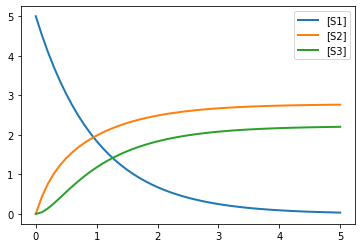

In [ ]:
REACTION_MDL = '''
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S2; k3*S3

k1 = 1; k2 = 2; k3 = 2.5
S1 = 5; S2 = 0; S3 = 0
'''

REACTION_RR = te.loada(REACTION_MDL)
REACTION_DATA = REACTION_RR.simulate()
REACTION_RR.plot(REACTION_DATA)

# Q2: Derive the transfer function $\frac{S_3(s)}{S_1(s)}$

### System equations

\begin{eqnarray}
\dot{S}_1 & = & -k_1 S_1  \\
\dot{S}_2 & = & - k_2 S_2 + k_1 S_1  + k_3 S_3\\
\dot{S}_3 & = & k_2 S_2 - k_3 S_3 \\
\end{eqnarray}


### Convert to Lapalce Transforms

\begin{eqnarray}
s S_1(s) & = & -k_1 S_1 (s) \\
sS_2 (s) & = & -k_2 S_2(s) + k_1 S_1(s) + k_3 S_3 (s)\\
s S_3(s) & = & k_2 S_2 (s)  - k_3 S_3 (s)\\
\end{eqnarray}

### Transfer Function


$G(s) = \frac{k_1 k_2 }{s^2 + (k_2 + k_3) s}$

In [ ]:
k1 = 1; k2 = 2; k3 = 2.5;
Gs = control.TransferFunction([k2*k1], [1, (k2+k3), 0])

# Q3: Poles of the Transfer Function

In [ ]:
Gs.pole()

array([-4.5,  0. ])

The poles are -4.5 and 0. The negative term indicates that the system will be stable while the 0 contributes a constant term. 

# Q4: Response to the Input Signal

find final value of S3 as it goes to 0

In [ ]:
time = np.linspace(0,5,51)
#impulseTF = control.TransferFunction([5], [1, k1])
response = control.forced_response(Gs, time, X0=[5,0])

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:924: UserWarning:

Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.



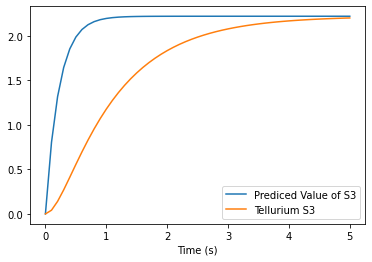

In [ ]:
_=plt.plot(response.t, response.y.flatten(), label='Prediced Value of S3')
_=plt.plot(REACTION_DATA[:,0], REACTION_DATA[:,3], label='Tellurium S3')
_=plt.xlabel('Time (s)')
_=plt.legend()

In [ ]:
Gs.dcgain()

inf

The final predicted value of S3 is very similar to that of the Tellurium simulation. The initial input signal of $S_1 (s) = \frac{5}{s + k_1}$ has a higher value than 2.2. The pole of 0 result in an interesting DC gain, which i would have expected to be negative as the output is less than the input. However, the pole of 0 produces strange behavior and accounts for the DC gain of infinity.